In [1]:
# Plot Percentage Loss over Influence Index
import matplotlib.pyplot as plt
import numpy as np
from E_GraphSAGE.BoT_IoT.results import report as plus_node_report
from E_GraphSAGE_edge.BoT_IoT.results import report as original_report

ignore_attacks = ['macro avg', 'Theft', 'Normal']
report = {}

for graph_type, graph_type_data in original_report.items():
    new_graph_type = f'original_{graph_type}'
    temp = graph_type_data.copy().items()
    for window, window_data in temp:
        temp2 = window_data.copy().items()
        for attack, attack_data in temp2:
            if attack in ignore_attacks:
                del window_data[attack]
    report[new_graph_type] = graph_type_data
            
for graph_type, graph_type_data in plus_node_report.items():
    new_graph_type = f'+node_{graph_type}'
    temp = graph_type_data.copy().items()
    for window, window_data in temp:
        temp2 = window_data.copy().items()
        for attack, attack_data in temp2:
            if attack in ignore_attacks:
                del window_data[attack]
    report[new_graph_type] = graph_type_data


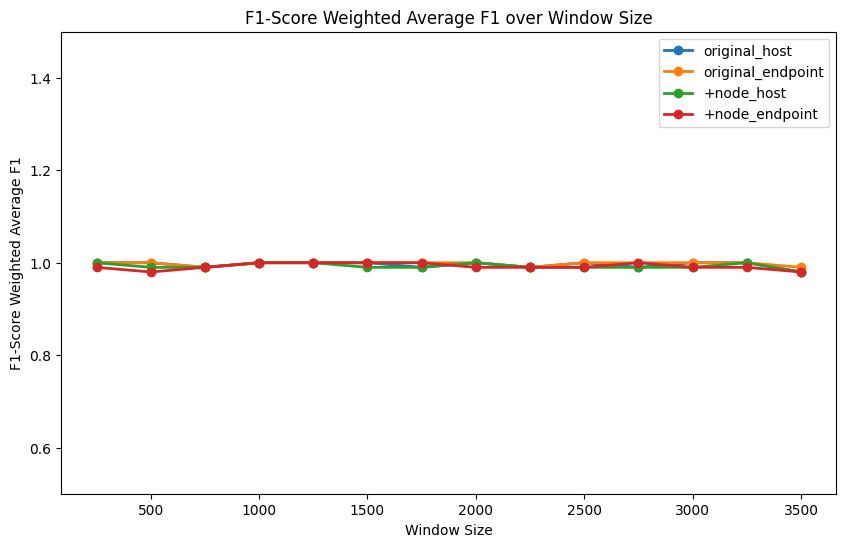

In [2]:
def plot_normal_f1_over_window(report):
    plt.figure(figsize=(10, 6))
    for graph_type, graph_type_data in report.items():
        window_sizes = []
        losses = []
        for window_size, attacks in graph_type_data.items():
            if 'Weighted Average' in attacks:
                window_sizes.append(window_size)
                class_data = attacks['Weighted Average']
                losses.append(class_data['normal_f1'])
        plt.plot(window_sizes, losses, label=graph_type, marker='o', linewidth=2)

    plt.xlabel('Window Size')
    plt.ylabel('F1-Score Weighted Average F1')
    plt.title('F1-Score Weighted Average F1 over Window Size')
    plt.ylim(0.5, 1.5)
    plt.legend()
    plt.show()

plot_normal_f1_over_window(report)

In [3]:
def get_percentage_loss(class_data, adversarial_attack):
    """Calculate the percentage loss."""
    normal_f1 = class_data['normal_f1']
    adversarial_f1 = class_data[f'{adversarial_attack}_f1']
                
    epsilon = 1e-10  # To avoid division by zero
    return (normal_f1 - adversarial_f1) / (normal_f1 + epsilon) * 100

In [4]:
def plot_weighted_average_over_window(report, adversarial_attack):
    plt.figure(figsize=(10, 6))
    color_map = {
        'original': 'tab:blue',
        '+node': 'tab:orange'
    }
    linestyle_map = {
        'host': '-',
        'endpoint': '--'
    }
    for graph_type, graph_type_data in report.items():
        if 'host' in graph_type:
            linestyle = linestyle_map['host']
        else:
            linestyle = linestyle_map['endpoint']
        color = color_map['original'] if graph_type.startswith('original') else color_map['+node']

        window_sizes = []
        losses = []
        for window_size, attacks in graph_type_data.items():
            if 'Weighted Average' in attacks:
                window_sizes.append(window_size)
                class_data = attacks['Weighted Average']
                losses.append(get_percentage_loss(class_data, adversarial_attack))
        window_sizes, losses = zip(*sorted(zip(window_sizes, losses)))
        plt.plot(window_sizes, losses, label=graph_type, marker='o', linewidth=2, color=color, linestyle=linestyle)

    plt.xlabel('Window Size')
    plt.ylabel('Percentage Loss Weighted Average F1')
    plt.title(f'Percentage Loss Weighted Average F1 over Window Size under {adversarial_attack} Attack')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


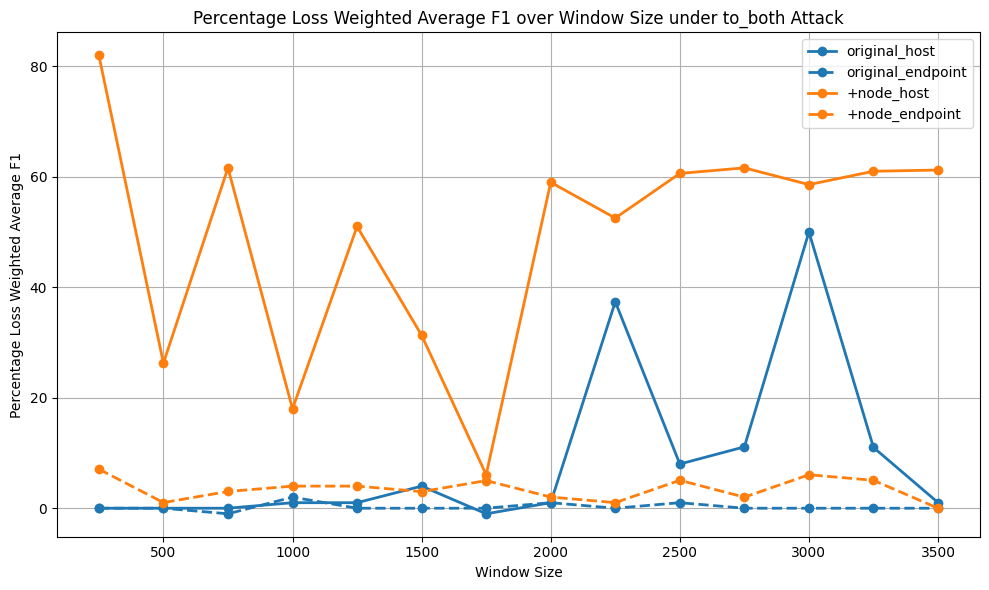

In [5]:

plot_weighted_average_over_window(report, 'to_both')

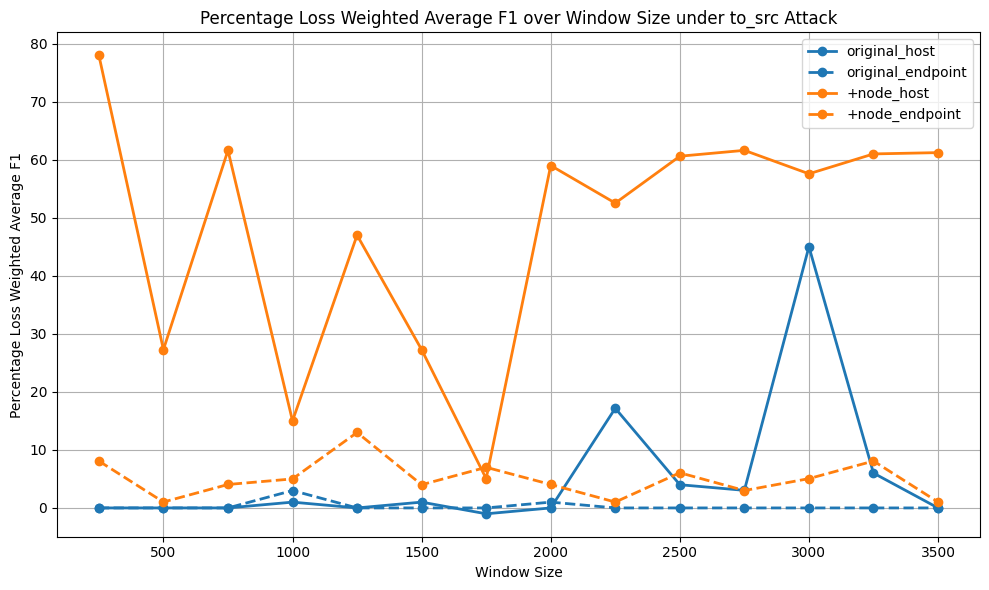

In [6]:
plot_weighted_average_over_window(report, 'to_src')

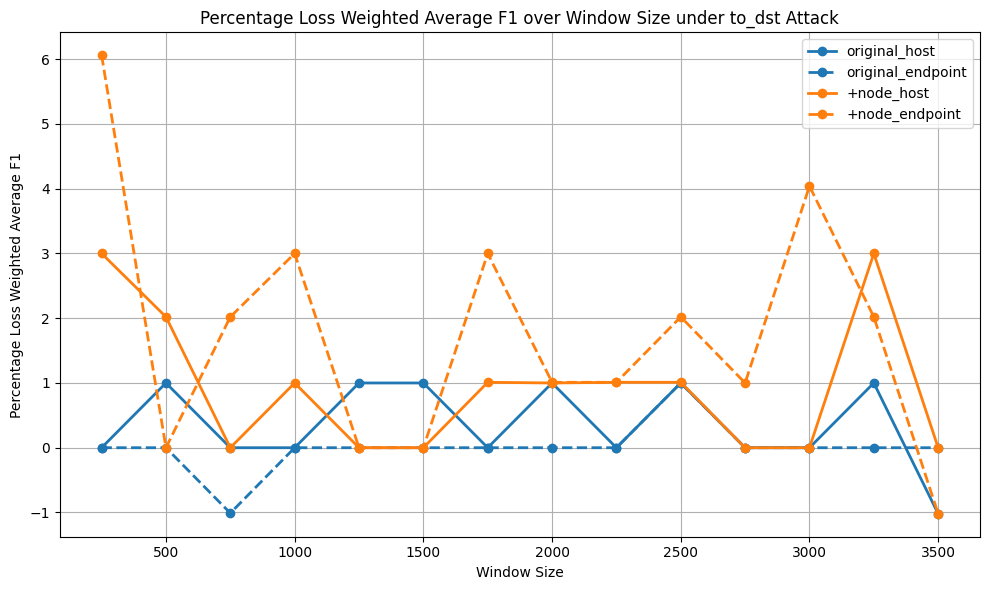

In [7]:
plot_weighted_average_over_window(report, 'to_dst')

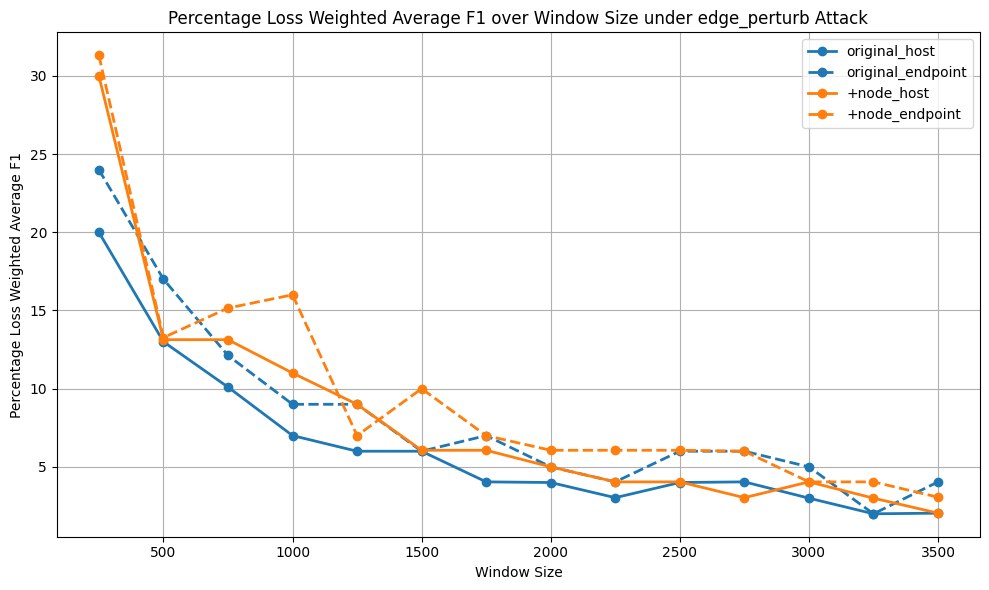

In [8]:
plot_weighted_average_over_window(report, 'edge_perturb')

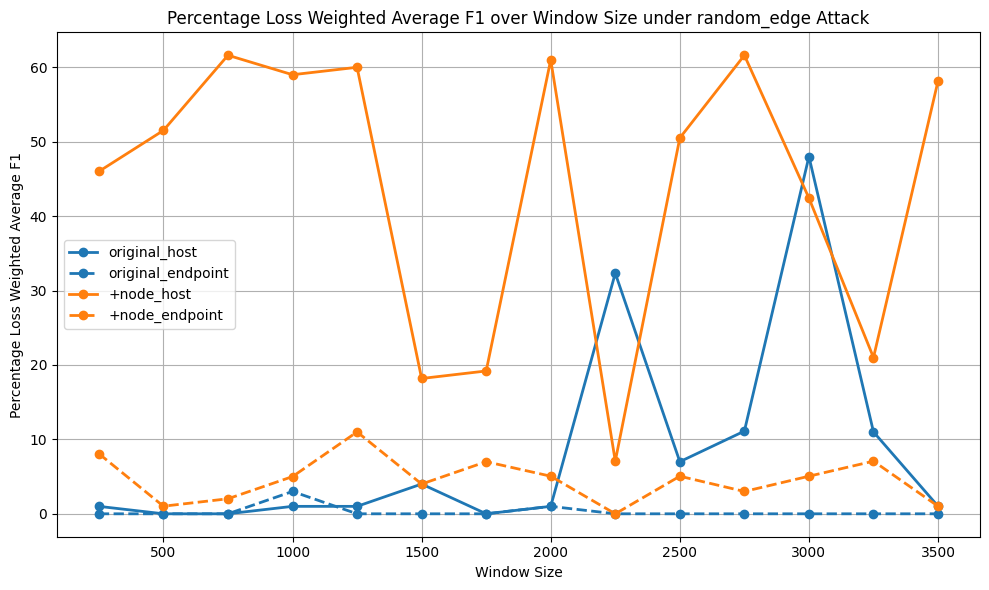

In [9]:
plot_weighted_average_over_window(report, 'random_edge')